<a href="https://colab.research.google.com/github/Rafi653/Data-Mining/blob/main/Data_Mining_Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 61 
Mohammad Rafi Shaik
Shubam Patidar

# Homework 5

**Before you start:** Read Chapter 8 Naive Bayes and Chapter 9 Decision Trees in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are always welcomed.

### **Problem 2**##

In this problem, we need to build a Naive Bayes model to classify whether a movie review is positive or negative. 

The given data is a subset of [the IMDB movie review dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

This might be your first time working with text mining. Therefore, the basic pre-processing steps are given below. 

**You have two major tasks:**

* Go through the code and get to know the purpose of each preprocessing step. Summarize what a preprocessing step does when required.
* Build a multinomial Naive Bayes model to classify the reviews.

In [ ]:
# # Please remove # and run the following code if you have an error while importing the dataset
# !pip install --upgrade openpyxl

In [2]:
# Import the dataset
import pandas as pd
from google.colab import files
file = files.upload()
df = pd.read_csv("IMDB Dataset_subset.csv")
df.head()

Saving IMDB Dataset_subset.csv to IMDB Dataset_subset.csv


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Packages required for preprocessing #
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer #for lemmatization
import re #regular expression package
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
X = [row for row in df['review']] #list of reviews
classes = df['sentiment'] #list of true classes

In [5]:
# Pre-process the data
reviews = []
lemmatizer = WordNetLemmatizer() 

for review in range(0, len(X)):
    # part 1
    review = re.sub(r'[\W_]', ' ', str(X[review])) 
    review = re.sub(r'\s+[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\s+', ' ', review, flags=re.I) 
    review = re.sub(r'^b\s+', '', review) # if a review record is in bytes, the corresponding line will have a letter 'b' appended at the start)
    review = review.lower()
    review = re.sub(r'[0-9]+', '', review) 

    # part 2
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)

    reviews.append(review)


**TODO 1**

Explain the function that part 1 and part 2 achieve in the loop.

"""
Part 1
-------
1. Converts variable review (each review in loop) into string using str(X[review])
2. re.sub: replaces certaing pattern with given replacement in a string
    1. Replace pattern : '[\W_]' with ' '
        replaces a character which is not a word character with white space
    2. Replace pattern : '\s+[a-zA-Z]\s+' with ' '
        Replaces unicode whitespace characters (which includes [ \t\n\r\f\v], that are between sentence. In other words, whitespace characters that has word in between them
    3. Replace pattern : '\^[a-zA-Z]\s+' with ' '
        Replaces unicode whitespace characters (which includes [ \t\n\r\f\v], at the start of sentence
    4. Replace pattern : '\s+' with ' '
        Replace remaining whitespace characters (which includes [ \t\n\r\f\v], in the review
    5. Replace pattern : '^b\s+' with ''
        Replace whitespace characters (which includes [ \t\n\r\f\v], which doesn't start with empty string at begining of the word
    6. Replace pattern : '[0-9]+' with ''
        Replace any digits present in the review
3. review.lower() converts all characters in review to lower case letters

Part 2
-------
  1. After replacing all special characters and digits and space and other symbols in review, we split review into words list.
  2. For each word we perform lemmatization
    It looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis
     to words, aiming to remove inflectional endings only and to return the base or 
     dictionary form of a word, which is known as the lemma.
      Example:
     Original Word ---> Root Word (lemma)      Feature

          meeting    --->   meet                (core-word extraction)
          was        --->    be                 (tense conversion to present tense)
          mice       --->   mouse               (plural to singular)
  3. Finally we stitch back all words in wordlist back as review by joining them with space ' '.
  
"""


In [6]:
# Continue with pre-processing
vectorizer = CountVectorizer(stop_words = "english", max_df=0.7, min_df=5) 
texts = vectorizer.fit_transform(reviews).toarray()  
vocab = vectorizer.vocabulary_ 
vocab = sorted(vocab.items(), key = lambda x: x[1])
vocab = [v[0] for v in vocab]


**TODO 2**

What do "texts" and "vocab" represent? What is the relationship between them?

"""
texts:
------

  1. texts is a sparse matrix of token(word) counts. 
  2. we remove built-in `english` stop words from word list.
  3. fit_transform: Learn the vocabulary dictionary and return document-term matrix.
      This is equivalent to fit followed by transform, but more efficiently implemented.

vocab:
------
  1. vocabulary_ is a dict where keys are words and values are indices in the feature matrix (texts).
  2. And then we sort them based on indices from texts matrix
  3. And finally, we remove indices and list words in same order

"""

**TODO 3**

Partition the data into 80% training and 20% validation set.

In [7]:

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True)
X_train = vectorizer.transform(df_train.review)
X_test = vectorizer.transform(df_test.review)
X_train.shape, X_test.shape

count_vect = CountVectorizer(binary=False).fit(df.review)
X_train_counts = count_vect.transform(df_train.review)
X_test_counts = count_vect.transform(df_test.review)


**TODO 4**

Build a multinomial Naive Bayes model on the training set.

In [8]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, df_train.sentiment)

**Hint:** [Multinomial Naive Bayes with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

**TODO 5**

Evaluate the model performance with the training and validation set. Comment on the model performance.

In [10]:
from sklearn.metrics import classification_report

X_test_counts = count_vect.transform(df_test.review)
predicts = clf.predict(X_test_counts)
print(classification_report(df_test.sentiment, predicts))

              precision    recall  f1-score   support

    negative       0.78      0.86      0.82       382
    positive       0.86      0.78      0.82       418

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



**Hint:** [Classification report with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

### **Problem 4** ##

The wine dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. (For illustration simplicity purpose, only 2 classes, 0 and 1, will be included for the classification task.) The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The objective is to classify the wines into class 0 or 1 using the 13 given attributes and a decision tree classifier.

In [11]:
from sklearn import datasets
import pandas as pd

# load the wine dataset 
wine = datasets.load_wine()
print(wine.DESCR)

# convert the data into dataframe format
X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
y = wine['target']

# only consider wine class 0 and 1
X = X.loc[0:129, :]
y = y[0:130]

X.head()

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**TODO 1**

Partition the data into 70% training and 30% validation set.

In [12]:
from sklearn.model_selection import train_test_split
list_y = list(y)
df = pd.DataFrame(list_y, columns =['target'])
x_train,x_val,y_train,y_val = train_test_split(X,df, test_size = 0.25, random_state=0)
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

(97, 13) (33, 13) (97, 1) (33, 1)


**TODO 2**

Fit a decision tree classifier on the training set with no pruning.

Plot the tree with the following requirements:


*   The node with splitting rule should contain variable name instead of variable index.
*   Pick the appropriate information to present in the node. The node should be of appropriate size so the information is clear for viewing.
*   The node should be colored.



In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
cross_val_score(clf, x_train, y_train, cv=10)


array([0.8       , 1.        , 1.        , 1.        , 1.        ,
       0.9       , 1.        , 0.77777778, 1.        , 1.        ])

In [14]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
acc_decision_tree = round(decision_tree.score(x_val, y_val) * 100, 2)
acc_decision_tree

90.91

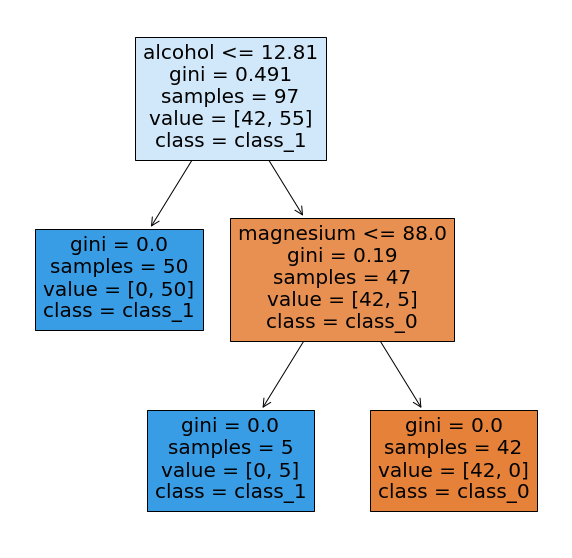

In [15]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, 
                   feature_names=wine.feature_names,  
                   class_names=wine.target_names,
                   filled=True)

**Hint:** [Decision tree classifier with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

**TODO 3**

Prune the tree with cost complexity. What is the best ccp value? Use visualization to back up your decision. 

Plot the pruned tree in the same manner as TODO 2.

In [16]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

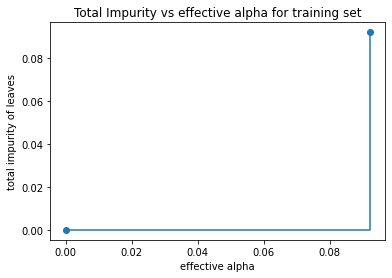

In [17]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3988937707898503


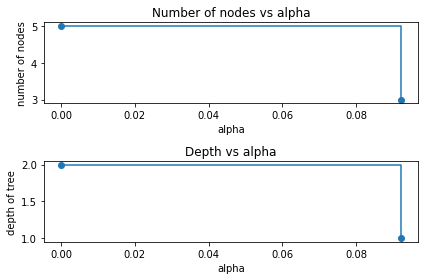

In [19]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


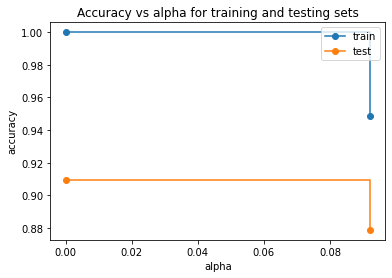

In [20]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_val, y_val) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


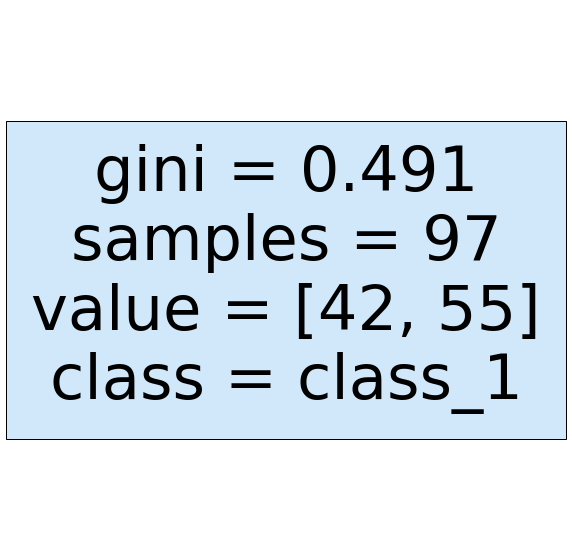

In [21]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, 
                   feature_names=wine.feature_names,  
                   class_names=wine.target_names,
                   filled=True)

**Hint:** [Minimal cost complexity pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)

[Post pruning decision trees with cost complexity with sklearn](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)